# Grade: /100 pts

# Assignment 05: Model Selection & Cross Validation

### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.



#### In this assignment, we will work on the bank loan data. The task is to build a model given the information of clients to predict whether the clients default or not. The data file is `loan_Data.csv`.  The target variable is `loanDefault`, which can be Fully Paid or Charged Off. The data includes some information about the payment behavior and customer characteristics such as job and purpose acquiring the current loan. You could view the description of the variables in `loan_param.xlsx`.



---

### Global Toolbox

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, roc_auc_score


pd.set_option('display.max_columns', 500)
%matplotlib inline
plt.style.use('ggplot')


_____

## Question 1: /10 pts

#### 1.1 Load the data `loan_Data.csv` and display the last 10 rows. How many features and how many obersvations are there in the dataset?

In [2]:
# Load the data and display
df = pd.read_csv('loan_Data.csv', sep=';')
# 2 pt
print(df.shape)
df.tail(10)



(1000, 18)


,loanAmnt,annualInc,application_type,int_rate,revol_bal,revol_util,dti,emp_length,grade,homeOwnership,installment,job,loanDefault,mortAcc,pub_rec_bankruptcies,purpose,term,Year
990,3900.0,38100.0,INDIVIDUAL,7.90,10936.0,91.9,15.06,6,A,MORTGAGE,122.04,University of North Carolina,Fully Paid,6,0,credit_card,36,2011
991,12000.0,70000.0,INDIVIDUAL,6.62,22219.0,60.1,28.58,10,A,MORTGAGE,368.45,school dist. 21,Fully Paid,12,0,debt_consolidation,36,2012
992,3125.0,70000.0,INDIVIDUAL,11.44,2875.0,58.0,2.64,10,B,MORTGAGE,102.97,Carrier,Fully Paid,5,1,credit_card,36,2015
993,30375.0,150000.0,INDIVIDUAL,14.31,55242.0,70.8,24.79,1,C,RENT,1042.73,Vice President,Fully Paid,11,0,debt_consolidation,36,2015
994,35000.0,135000.0,INDIVIDUAL,11.99,30620.0,56.0,18.80,1,C,MORTGAGE,778.38,Registered Nurse,Fully Paid,19,0,debt_consolidation,60,2015
995,10000.0,40000.0,INDIVIDUAL,17.86,9023.0,52.5,26.07,5,D,MORTGAGE,253.18,property manager,Charged Off,11,0,credit_card,60,2015
996,9000.0,96000.0,INDIVIDUAL,6.49,17017.0,30.4,8.91,1,A,RENT,275.81,Communications Manager,Fully Paid,16,0,credit_card,36,2014
997,5600.0,65000.0,INDIVIDUAL,8.90,21409.0,92.7,12.09,4,A,MORTGAGE,177.82,Grasmere Place,Fully Paid,11,0,vacation,36,2012
998,25000.0,79980.0,INDIVIDUAL,19.72,9706.0,69.8,17.73,2,D,RENT,658.46,bed bath & beyond,Fully Paid,9,0,debt_consolidation,60,2012
999,15000.0,63000.0,INDIVIDUAL,11.99,15493.0,69.5,17.57,2,B,RENT,498.15,Account Manager,Fully Paid,28,0,credit_card,36,2014


**Written Answer** [2 pt]: 
There are 1000 observations and 18 features.

#### 1.2 Create a bar graph to visualize the count of `Charged Off` and `Fully Paid`. Calculate the percentage of `Charged off`, which is the percentage of default.

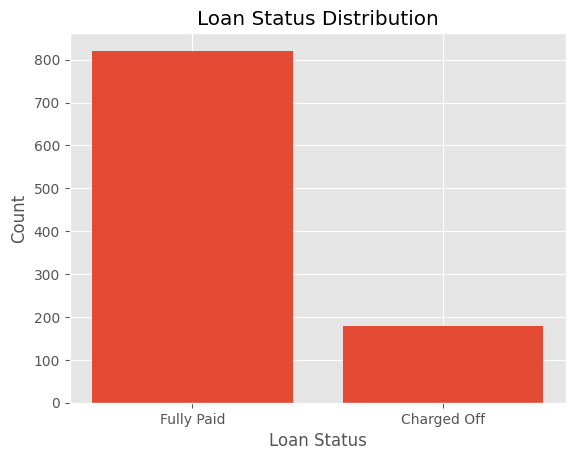

Charged Off Percentage: 17.90%


In [3]:
# Plot

charged_off_count = (df['loanDefault'] == 'Charged Off').sum()
fully_paid_count = (df['loanDefault'] == 'Fully Paid').sum()
total_loans = len(df)
labels = ['Fully Paid', 'Charged Off']
counts = [fully_paid_count, charged_off_count]
plt.bar(labels, counts)
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status Distribution')
plt.show()

# 2pts

# Calculate the percentage

charged_off_percentage = (charged_off_count / total_loans) * 100
print(f'Charged Off Percentage: {charged_off_percentage:.2f}%')

**Written Answer** [2 pt]: 

The percentage of "Charged off" is 17.90%.


#### 1.3 Change the values of the column `loanDefault` to 1 if the loan is `Charged Off` and 0 if it is `Fully Paid`. 

In [4]:
# Change the values
df['loanDefault'] = df['loanDefault'].apply(lambda status: 1 if status == 'Charged Off' else 0)

# 2 pts

_____________

## Question 2: /16 pts 
Here we are interested in if the distribution of income is different between clients who defaulted and those who did not default on their loans.

#### 2.1 First create the histogram of the annual income `annualInc` for all the clients. Do not forget to label the axes.

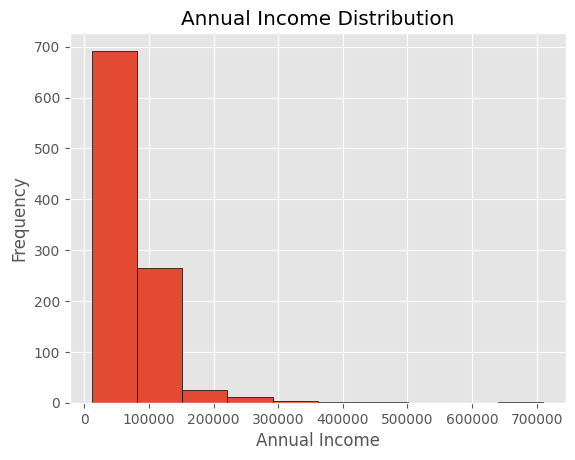

In [5]:
plt.hist(df['annualInc'], bins=10, edgecolor='black')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Annual Income Distribution')
plt.show()

# 2 pts

What do you notice about the distribution of the annual income variable? What transformation would you suggest for it?

**Witten Answer**[2 pts]: 
The distribution of the annual income variable is very right-skewed. I would suggest a log-transformation for it.

#### 2.2  Apply the transformation (*i.e.*, based on your answer to the previous question) to annual income and plot the histogram of the transformed version. Update (*i.e.*, overwrite) the original entry values of `annualInc` with the transformed ones.

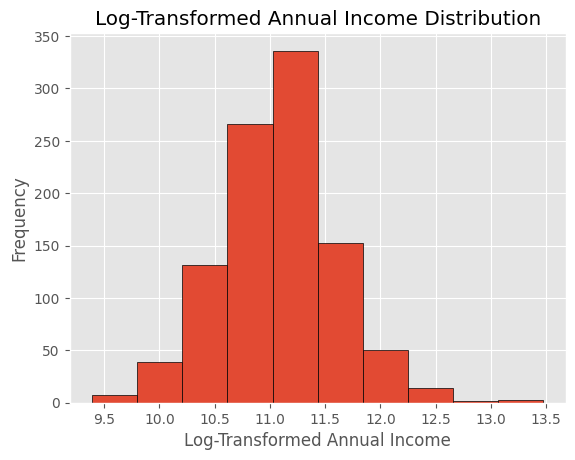

In [6]:
# Apply transformation and plot distribution

df['annualInc'] = np.log(df['annualInc'])
plt.hist(df['annualInc'], bins=10, edgecolor='black')
plt.xlabel('Log-Transformed Annual Income')
plt.ylabel('Frequency')
plt.title('Log-Transformed Annual Income Distribution')
plt.show()
# 4 pts

#### 2.3 Plot the histograms of annual income for clients who defaulted and clients who did not default. Compare to see if there is any noticeable difference. Comment qualitatively.

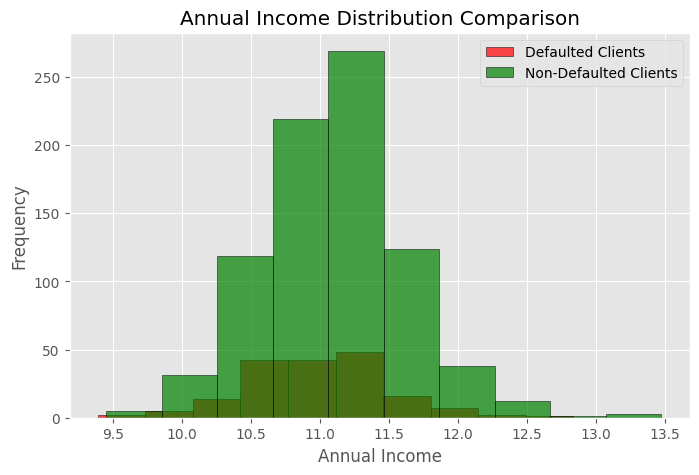

In [7]:
# Plot two distributions overlaid (use the alpha argument to create contrast in overlay plots
defaulted_clients = df[df['loanDefault'] == 1]
non_defaulted_clients = df[df['loanDefault'] == 0]

# Create a single plot with both histograms
plt.figure(figsize=(8, 5))

plt.hist(defaulted_clients['annualInc'], bins=10, color='red', alpha=0.7, label='Defaulted Clients', edgecolor='black')
plt.hist(non_defaulted_clients['annualInc'], bins=10, color='green', alpha=0.7, label='Non-Defaulted Clients', edgecolor='black')

plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Annual Income Distribution Comparison')
plt.legend()

plt.show()
# 4 pts

**Written Answer** [2pts]: There does not appear to be any noticeable difference in the distributions of annual incomes for clients that did default and those that didn't. If anything, maybe the variance in income in non-defaulted clients is slightly lower than the variance in income of defaulted clients.

___________

## Question 3: /14 pts

Let's build a model and use the annual income to predict the default outcome.

#### 3.1 Create a model pipline to include preprocessing step using `StandardScaler` and a basic logistic regression model (with default penalization and use `solver='lbfgs'`, `max_iter=10000` and `random_state=0`)

In [8]:
# Create a model pipline
model = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(solver='lbfgs', max_iter=10000, random_state=0))
])
# 2 pt

#### 3.2 Use a 80/20 train-test split of the data and remember to set `random_state=0`. Fit the model and then evaluate this model plotting the ROC curve and reporting the AUC value. 

In [9]:
# Get the X and y
X = df['annualInc'].values.reshape(-1, 1)
y = df['loanDefault'].values.astype(int)

# Split the train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the model
model.fit(X_train, y_train)

# 4 pts

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(max_iter=10000, random_state=0))])

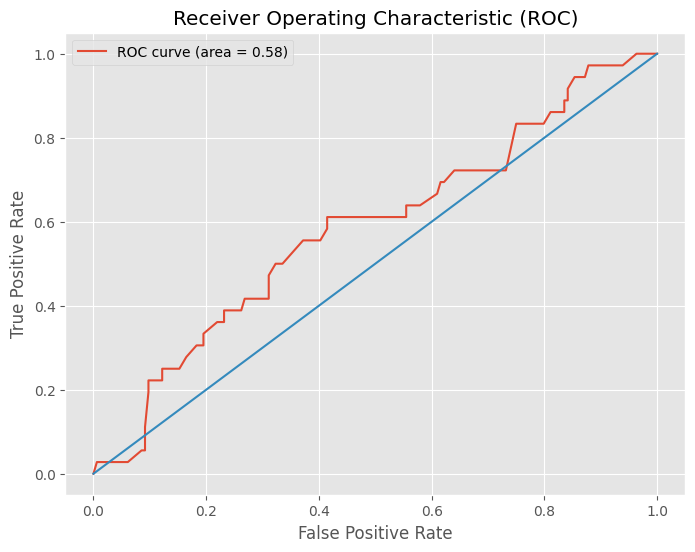

AUC: 0.58


In [10]:
# Use predict_proba to get the probability of default
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 2 pts

# Plot the ROC curve and report AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.show()

print(f'AUC: {roc_auc:.2f}')

# 4 pts

Is income itself alone good enough to predict the default outcome?


**Written Answer** [2 pt]: No, the AUC is only slightly above .5; the model is only slightly better than random chance.

____________

## Question 4: /34

Here, let's use cross-validation to find how each numeric feature performs to predict the default status.


#### 4.1: Let's write our own function instead of using `cross_val_score` to get the cross-validation AUC score. First, create a function `AUC_calculation` with inputs `(model, X, y, index_train, index_test)`  which calculates the AUC of the model trained on `index_train` and tested on `index_test`. Here we assume that X and y are pandas dataframe.

In [11]:
def AUC_calculation(model, X, y, index_train, index_test):
    # Define Xtrain, ytrain, Xtest, ytest 
    X_train, y_train = X.iloc[index_train], y.iloc[index_train]
    X_test, y_test = X.iloc[index_test], y.iloc[index_test]

    # Fit the model
    model.fit(X_train, y_train)
    
    # Calculate the auc score
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    score_auc = roc_auc_score(y_test, y_pred_proba) 
    return score_auc
# 6 pts

#### 4.2: Create a function named `AUC_cross_validation` which has as input (model, X, y, n_fold) and does a `StratifiedKFold` cross validation with n_fold and its output should be a list with the AUC for each fold. This function will call the above function `AUC_calculation`.

In [12]:
def AUC_cross_validation(model, X, y, n_fold):
    # Create the stratified folds
    folds = StratifiedKFold(n_splits=n_fold) 
    list_auc = []
    # Loop over folds and compute the AUC score for each fold
    for train, test in folds.split(X, y):
        auc = AUC_calculation(model, X, y, train, test)
        list_auc.append(auc)
    return list_auc
# 6 pts 

#### 4.3 Now we are ready to estimate and compare through cross validation the performance of all the *simple models* that only use one numeric predictor as input. Here we will apply logarithm transformation for the `loanAmnt` and replace it. We will also exclude `Year` and `installment`.

In [13]:
# Extract only the numeric features
feau_num = ['int32', 'int64', 'float64']
data_num = pd.DataFrame(df.select_dtypes(include=feau_num))


# Log transform 
data_num['loanAmnt'] = np.log(data_num['loanAmnt'])


# Drop
data_num = data_num.drop(columns=['Year', 'installment', 'loanDefault'])


data_num.head()
# 2pts

,loanAmnt,annualInc,int_rate,revol_bal,revol_util,dti,emp_length,mortAcc,pub_rec_bankruptcies,term
0,9.210340,11.669929,11.44,36369.0,41.8,26.24,10,16,0,36
1,8.987197,11.082143,11.99,20131.0,53.3,22.05,4,17,0,36
2,9.655026,10.670280,10.49,11987.0,92.2,12.79,1,13,0,36
3,8.881836,10.896739,6.49,5472.0,21.5,2.60,6,6,0,36
4,10.101313,10.915088,17.27,24584.0,69.8,33.95,9,13,0,60


#### 4.4: Use the function `AUC_cross_validation` and the model from Q3.1 to compute cross-validation estimates of the AUC for each single numeric feature model, and use a pandas dataframe (named `AUC_models`) to store the AUC value for each fold and each of the models (use `n_fold=10`).

The column names of `AUC_models` have to be in the form `Simple-[numeric predictor variable]`, *e.g.*, `simple-int_rate`.

In [14]:
# Construct AUC_models dataframe
AUC_models = pd.DataFrame({})

# Run cross-validation for each feature
features = data_num.columns
y = pd.Series(y.ravel())

for f in features:
    X = data_num[[f]]
    AUC_models[f'Simple-{f}'] = AUC_cross_validation(model, X, y, n_fold=10)
# 8 pts

In [15]:
# Print AUC_models dataframe. The shape should be 10 x number of features
AUC_models


,Simple-loanAmnt,Simple-annualInc,Simple-int_rate,Simple-revol_bal,Simple-revol_util,Simple-dti,Simple-emp_length,Simple-mortAcc,Simple-pub_rec_bankruptcies,Simple-term
0,0.430546,0.681077,0.723246,0.548547,0.566265,0.568746,0.498937,0.635719,0.499291,0.597449
1,0.623984,0.434282,0.797425,0.566396,0.522358,0.540650,0.649390,0.453591,0.482385,0.646341
2,0.442073,0.697154,0.610772,0.582656,0.509824,0.497967,0.441734,0.566396,0.531843,0.547425
3,0.562669,0.631098,0.651084,0.574526,0.422087,0.644648,0.519986,0.489160,0.567073,0.596883
4,0.440041,0.552168,0.522358,0.484417,0.473577,0.531165,0.561992,0.506098,0.519648,0.513550
5,0.523374,0.449864,0.745935,0.593496,0.506775,0.526762,0.533198,0.509485,0.488482,0.507453
6,0.524051,0.639566,0.765921,0.594851,0.651423,0.563686,0.539634,0.577575,0.506775,0.636856
7,0.629743,0.483401,0.761518,0.437669,0.555894,0.523035,0.430894,0.465447,0.518970,0.741870
8,0.461043,0.622290,0.607724,0.521003,0.593835,0.603659,0.561992,0.542683,0.554878,0.581301
9,0.485772,0.525745,0.441396,0.531843,0.386518,0.588753,0.599255,0.465786,0.469512,0.529133


#### 4.5: Let's use a `sns.boxplot`` (without presenting outliers) to show the distribution of the AUC scores for each feature.

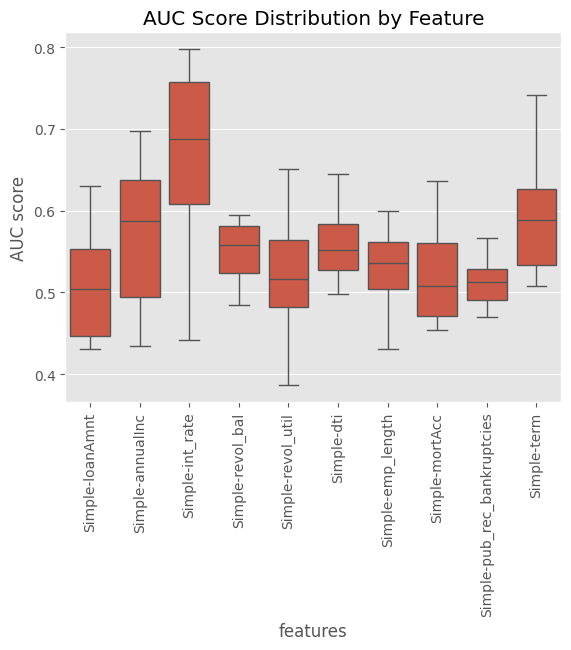

In [16]:
# Hint: use data=pd.melt(AUC_models) in boxplot
data = pd.melt(AUC_models)
sns.boxplot(x='variable', y='value', data=data, showfliers=False)
plt.title('AUC Score Distribution by Feature')
plt.xlabel('features')
plt.ylabel('AUC score')
plt.xticks(rotation=90)
plt.show()
#5 pts


What is the feature that yields the best performance?

**Written Answer** [1 pt]: The interest rate (Simple-int_rate) yields the best performance since it has the highest median AUC score.

#### 4.6: Now let's use a model including all the numeric features for training. Again use 10-fold cross-validation to determine if this new model has better performance. Add the results to the previous AUC_models dataframe and visualize again using boxplots.

In [17]:
# Get the X and y
X = data_num
y = pd.Series(y.ravel())

# Calculate the auc scores using cross validation
AUC_num_features = AUC_cross_validation(model, X, y, n_fold=10)

# 4 pts 

# Include the auc scores in the AUC_models DataFrame in the column 'All_numeric'
AUC_models['All_numeric'] = AUC_num_features

# Print the new data frame 
AUC_models


,Simple-loanAmnt,Simple-annualInc,Simple-int_rate,Simple-revol_bal,Simple-revol_util,Simple-dti,Simple-emp_length,Simple-mortAcc,Simple-pub_rec_bankruptcies,Simple-term,All_numeric
0,0.430546,0.681077,0.723246,0.548547,0.566265,0.568746,0.498937,0.635719,0.499291,0.597449,0.766832
1,0.623984,0.434282,0.797425,0.566396,0.522358,0.540650,0.649390,0.453591,0.482385,0.646341,0.748645
2,0.442073,0.697154,0.610772,0.582656,0.509824,0.497967,0.441734,0.566396,0.531843,0.547425,0.647696
3,0.562669,0.631098,0.651084,0.574526,0.422087,0.644648,0.519986,0.489160,0.567073,0.596883,0.686992
4,0.440041,0.552168,0.522358,0.484417,0.473577,0.531165,0.561992,0.506098,0.519648,0.513550,0.539973
5,0.523374,0.449864,0.745935,0.593496,0.506775,0.526762,0.533198,0.509485,0.488482,0.507453,0.680894
6,0.524051,0.639566,0.765921,0.594851,0.651423,0.563686,0.539634,0.577575,0.506775,0.636856,0.752710
7,0.629743,0.483401,0.761518,0.437669,0.555894,0.523035,0.430894,0.465447,0.518970,0.741870,0.665989
8,0.461043,0.622290,0.607724,0.521003,0.593835,0.603659,0.561992,0.542683,0.554878,0.581301,0.691734
9,0.485772,0.525745,0.441396,0.531843,0.386518,0.588753,0.599255,0.465786,0.469512,0.529133,0.515583


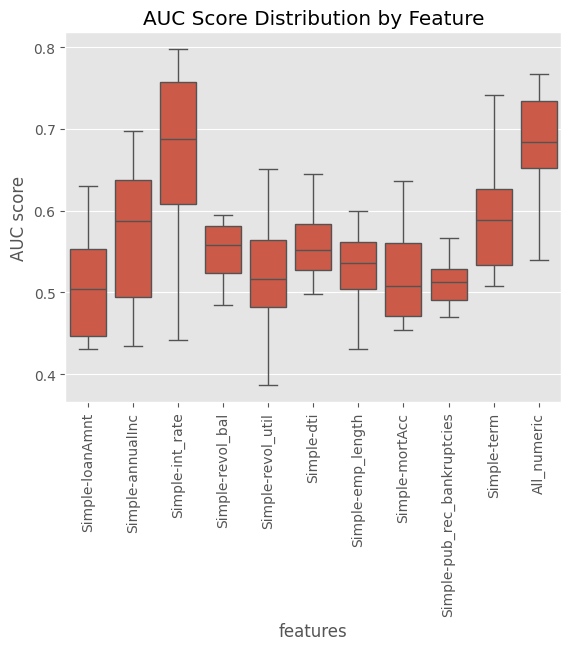

In [18]:
# Plot
data = pd.melt(AUC_models)
sns.boxplot(x='variable', y='value', data=data, showfliers=False)
plt.title('AUC Score Distribution by Feature')
plt.xlabel('features')
plt.ylabel('AUC score')
plt.xticks(rotation=90)
plt.show()
#5 pts
 

# 2 pts

_____________

### Question 5: /10 pts

#### 5.1 Let's also include the categorical variable `grade` to the model (in addition to all the all the numeric features). And, again, add the results to the `AUC_models` dataframe.

In [19]:
# Convert category into numerical values
grades = pd.get_dummies(df, columns=['grade'])
grades = grades.filter(like='grade_')

# Add this feature to all the numeric variables
data_num = pd.concat([data_num, grades], axis=1)

# Calculate the auc scores using cross validation
auc_num_features = AUC_cross_validation(model, data_num, y, n_fold=10)

# Include the auc scores in the AUC_models DataFrame in the column 'All_numeric_&_Grade'
AUC_models['All_numeric_&_Grade'] = auc_num_features

# 4 pts

#### 5.2 Print the AUC mean and AUC standard deviation for each of the models. Which model would you choose and why?

In [20]:
auc_mean = AUC_models.mean()
auc_std = AUC_models.std()

print('AUC mean:\n', auc_mean)
print('AUC stddev:\n', auc_std)

# 6 pts

AUC mean:
 Simple-loanAmnt                0.512330
Simple-annualInc               0.571665
Simple-int_rate                0.662738
Simple-revol_bal               0.543540
Simple-revol_util              0.518856
Simple-dti                     0.558907
Simple-emp_length              0.533701
Simple-mortAcc                 0.521194
Simple-pub_rec_bankruptcies    0.513886
Simple-term                    0.589826
All_numeric                    0.669705
All_numeric_&_Grade            0.675565
dtype: float64
AUC stddev:
 Simple-loanAmnt                0.073961
Simple-annualInc               0.095692
Simple-int_rate                0.117232
Simple-revol_bal               0.051115
Simple-revol_util              0.078869
Simple-dti                     0.044097
Simple-emp_length              0.066451
Simple-mortAcc                 0.058632
Simple-pub_rec_bankruptcies    0.031200
Simple-term                    0.072102
All_numeric                    0.084687
All_numeric_&_Grade            0.089453
d

**Written Answer** [2 pts]: I would choose the `All_numeric_&_grade` model. It has the highest AUC mean which means it performs the "best" (on this metric of separability), despite having a slightly higher stddev.

______________

### Question 6: /14pts

Train and test the model you selected using a 80/20 train-test split of the data.

- Use boostrap technique to find the 95% CI for the test AUC. 
- Plot the distribution of the boostrap AUC scores.

In [21]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(data_num, y, test_size=0.2)

#Fit the model
model.fit(X_train, y_train)

#Calculate the predictions on the Test data
y_pred = model.predict_proba(X_test)[:, 1]

# Create the AUC
auc = roc_auc_score(y_test, y_pred)
# 2 pt

In [22]:
# Boostrap
iters = 1000
aucs = []

for _ in range(iters):
    rand = np.random.randint(0, len(X_test), size=len(X_test))
    X_test_sample = X_test.iloc[rand]
    y_test_sample = y_test.iloc[rand]
    y_pred_sample = model.predict_proba(X_test_sample)[:, 1]

    auc_sample = roc_auc_score(y_test_sample, y_pred_sample)
    aucs.append(auc_sample)
# 4 pts

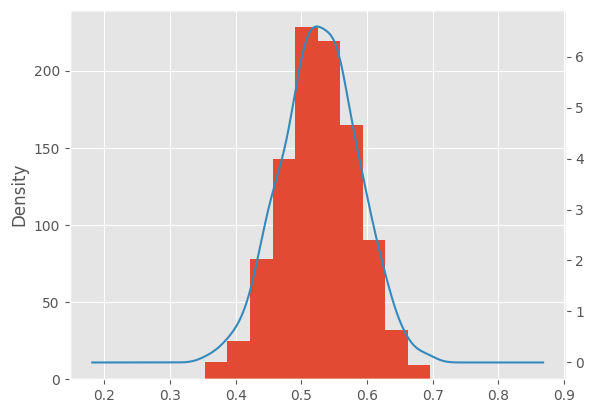

In [23]:
# Plot
bootstrap = pd.DataFrame(data=aucs, columns=["AUC"])
ax = bootstrap.AUC.plot(kind="hist")
bootstrap.AUC.plot(kind="kde", ax=ax, secondary_y=True)
plt.show()

# 2 pts

In [24]:
# Find the confidence interval
alpha = 0.99
p1 = (1 - alpha)/2
p2 = 1 - p1
ci = np.quantile((bootstrap), (p1, p2))

print(f'The CI for the AUC of the model is: {ci}')
# 6 pts

The CI for the AUC of the model is: [0.38082879 0.67174539]
